In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import schemdraw
from schemdraw.flow import Process, Arrow


labels = pd.read_csv("../data/prompt_purpose_labels.csv")

freq = labels["label"].value_counts()
freq

Code generation          380
Basic prog. knowledge    101
Code refinement           52
Irrelevant                51
Incomplete                43
Bug identification        42
Testing                   32
Code comprehension        32
Concept comprehension     19
Other                      4
Name: label, dtype: int64

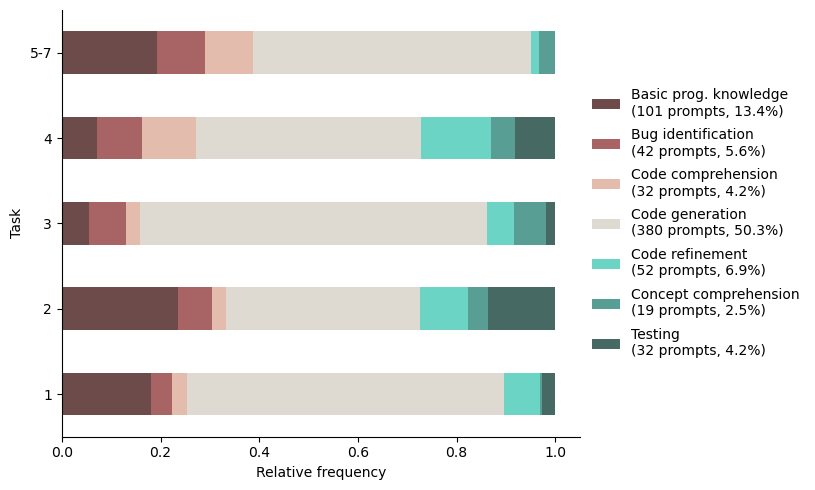

In [2]:
colors = []

latex_cols = """\definecolor{docsquery}{HTML}{6D4B4B}
\definecolor{bugident}{HTML}{A86464}
\definecolor{codecomp}{HTML}{E4BCAD}
\definecolor{codegen}{HTML}{DEDAD2}
\definecolor{coderef}{HTML}{6CD4C5}
\definecolor{conceptcomp}{HTML}{599E94}
\definecolor{testing}{HTML}{466964}"""

latex_col_to_labels = {"codegen": "Code generation", "conceptcomp": "Concept comprehension", "codecomp": "Code comprehension", "bugident": "Bug identification", "docsquery": "Basic prog. knowledge", "testing": "Testing", "coderef": "Code refinement"}

colors = {latex_col_to_labels[define.split("color{")[1].split("}")[0]] :  "#" + define.split("HTML}{")[1].replace("}", "") for define in latex_cols.split("\n")}
#colors["Other"] = "#d6d6d4"

colors = {key: value for key, value in sorted(colors.items())}


df = pd.DataFrame(labels[(labels["label"]!="Irrelevant") & (labels["label"]!="Incomplete") & (labels["label"]!="Other")])
df["task"] = df["task"].replace({5: "5-7", 6: "5-7", 7: "5-7"})
df["label"] = df["label"].replace({label: label + "\n(" + str(f) + " prompts, " + '{:.1%})'.format((f/freq.sum()))  for label, f in freq.to_dict().items()})

# Group by 'task' and 'label', and count the occurrences
grouped = df.groupby(['task', 'label']).size().reset_index(name='count')
total_task = grouped.groupby("task").aggregate({"count": sum}).reset_index()

# Calculate relative label distribution
grouped['relative_count'] = grouped.apply(lambda row: row['count'] / total_task.loc[total_task['task'] == row['task'], 'count'].values[0], axis=1)

# Pivot the table to have 'task' as rows and 'label' as columns
pivoted = grouped.pivot(index='task', columns='label', values='relative_count')

# Set the figure size
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the pivoted DataFrame as a horizontal bar plot
pivoted.plot(kind='barh', stacked=True, ax=ax, color=list(colors.values()))

# Set the plot labels and title
plt.xlabel('Relative frequency')
plt.ylabel('Task')
#plt.title('Relative purpose distribution per task')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Adjust the figure margins
plt.tight_layout()
#handles, legend_labels = plt.gca().get_legend_handles_labels()
#order = [2,5,3,0,1,7,4,6]
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=[handles[idx] for idx in order],labels = [legend_labels[idx] for idx in order], frameon=False, labelspacing = 1.25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False, labelspacing = 0.7)

plt.rcParams.update({'font.size': 14.5, 'font.family': 'Times New Roman'})

# Save the figure in full size
fig.savefig('plots/relative_prompt_purpose_per_task.png', dpi=300, bbox_inches='tight')


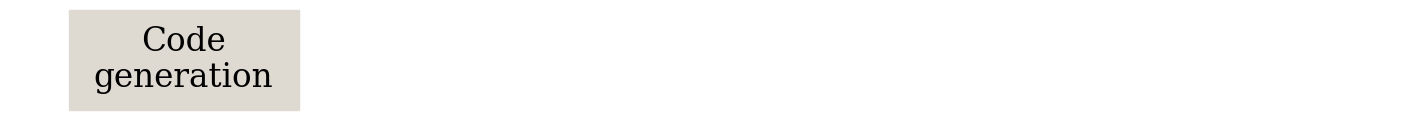

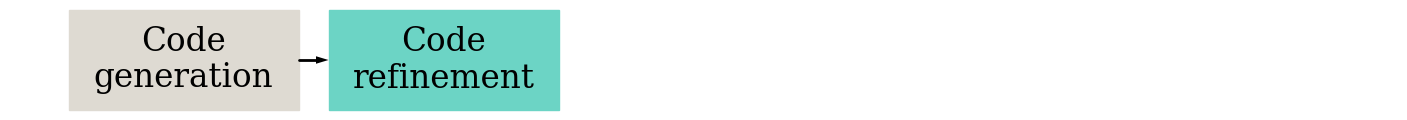

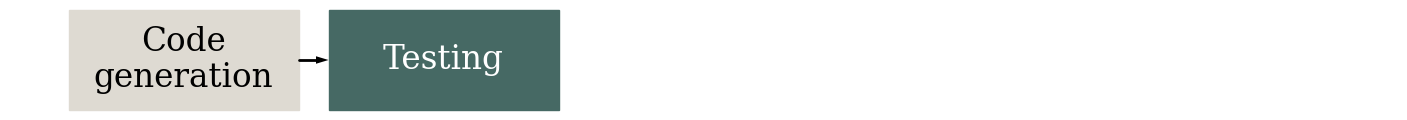

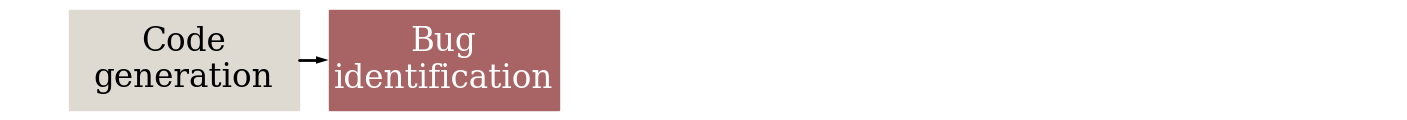

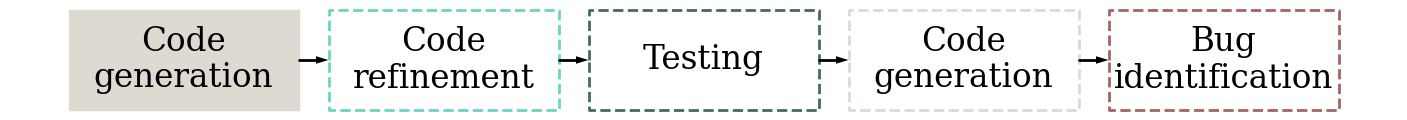

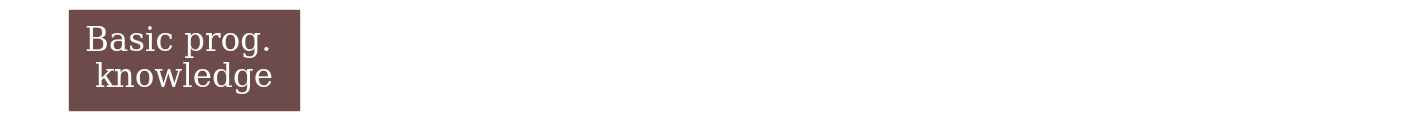

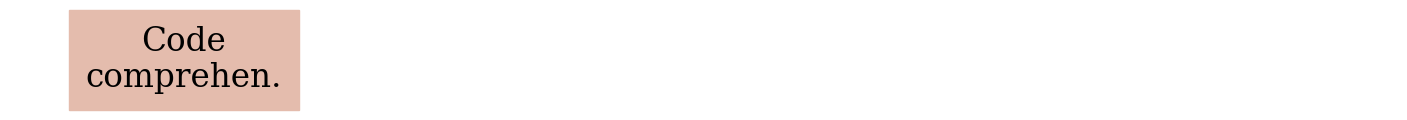

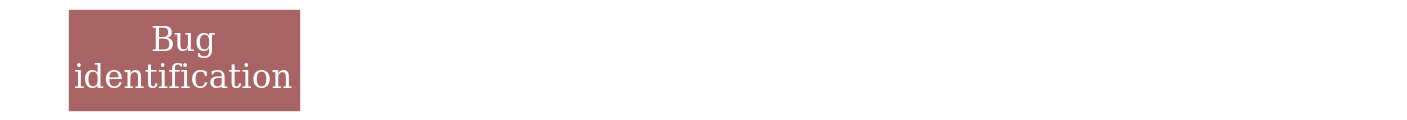

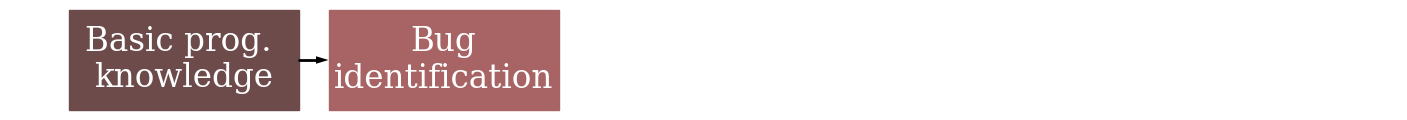

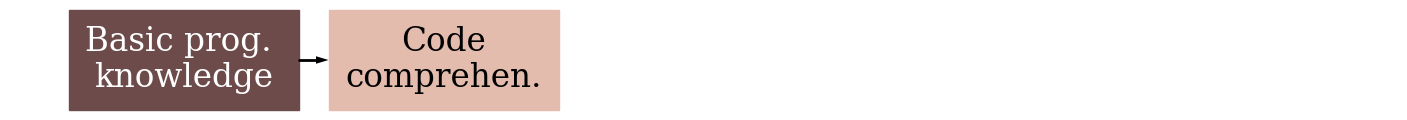

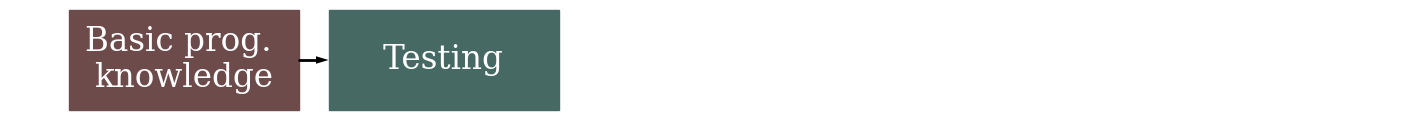

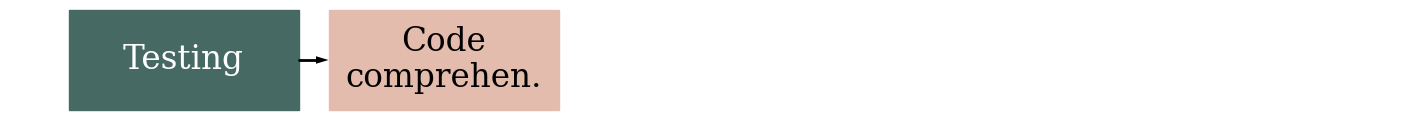

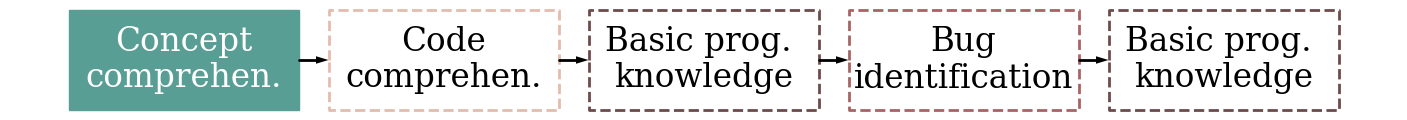

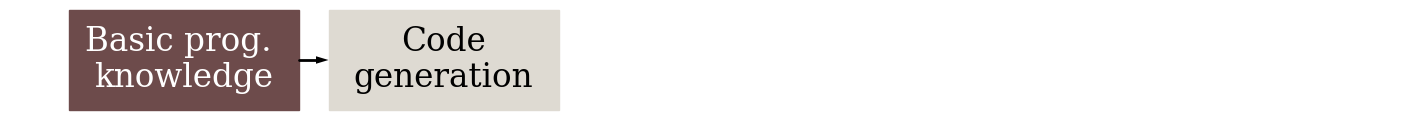

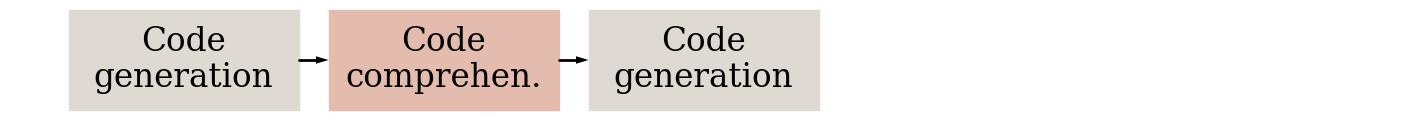

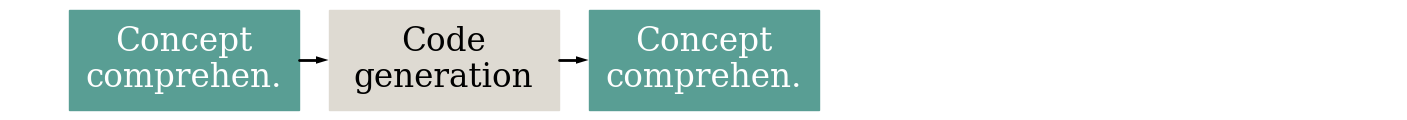

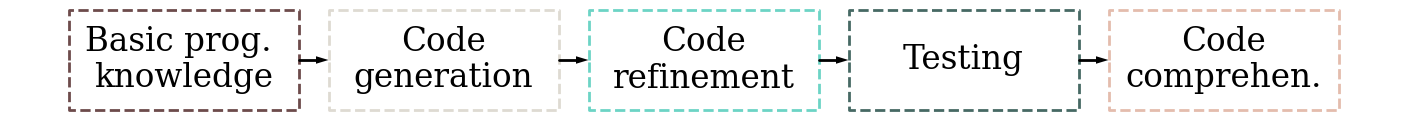

In [3]:
import schemdraw
from schemdraw.flow import Process, Arrow
t = "Testing"
cg = "Code generation"
bi = "Bug identification"
cr = "Code refinement"
cdc = "Code comprehension"
cnc = "Concept comprehension"
fpk = "Basic prog. knowledge"

structures = {"s1":[cg], 
              "s2a": [cg, cr], 
              "s2b": [cg, t],
              "s2c": [cg, bi],
              "s3": [cg, cr, t, cg, bi],
              
              "s4":[fpk], 
              "s5":[cdc], 
              "s6": [bi],  
              "s7a": [fpk, bi], 
              "s7b": [fpk, cdc],
              "s8a": [fpk, t],
              "s8b": [t, cdc],
              "s9": [cnc, cdc, fpk, bi, fpk],
              
              "s10": [fpk, cg],
              "s11": [cg, cdc, cg],
              "s12": [cnc, cg, cnc],
              "s13": [fpk, cg, cr, t, cdc]}

config = {
            "Bug identification": {"label": "Bug\nidentification", "fontcolor": "white"},
            "Code comprehension": {"label": "Code\ncomprehen.", "fontcolor": "black"},
            "Code generation": {"label": "Code\ngeneration", "fontcolor": "black"},
            "Code refinement": {"label": "Code\nrefinement", "fontcolor": "black" },
            "Concept comprehension": {"label": "Concept\ncomprehen.", "fontcolor": "white"},
            "Basic prog. knowledge": {"label": "Basic prog. \nknowledge", "fontcolor": "white"},
            "Testing": {"label": "Testing", "fontcolor": "white"}
        }

def draw_structure(structure, name, config=config, box_width=4.8,box_height=1.5, arrow_width=0.2):

    with schemdraw.Drawing() as d:
        for i, element in enumerate(structure):
            h = colors[element].replace("#", "")
            rgb_color = tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))
            d += Process(w=box_width,).label(config[element]["label"], fontsize=25, font="serif", color=config[element]["fontcolor"]).linestyle("").fill(rgb_color)
            if i+1 <len(structure):
                d += Arrow().right(d.unit*arrow_width)
        
        if len(structure)<5:
            for _ in range(5-len(structure)):
                d += Arrow(color=(1,1,1,0.0)).right(d.unit*arrow_width)
                d += Process(w=box_width).label("").linestyle("").fill((1,1,1,0.0))
                
        d.save(f"plots/structures/{name}.png", dpi=200)

def draw_structure_s13(structure, name, config=config, box_width=4.8,box_height=1.5, arrow_width=0.2):

    with schemdraw.Drawing() as d:
        for i, element in enumerate(structure):
            h = colors[element].replace("#", "")
            rgb_color = tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))
            d += Process(w=box_width,).label(config[element]["label"], fontsize=25, font="serif", color="black").linestyle("--").color(rgb_color).fill("white")
            if i+1 <len(structure):
                d += Arrow().right(d.unit*arrow_width)
        
        if len(structure)<5:
            for _ in range(5-len(structure)):
                d += Arrow(color=(1,1,1,0.0)).right(d.unit*arrow_width)
                d += Process(w=box_width).label("").linestyle("").fill((1,1,1,0.0))
                
        d.save(f"plots/structures/{name}.png", dpi=200)

def draw_structure_s9(structure, name, config=config, box_width=4.8,box_height=1.5, arrow_width=0.2):

    with schemdraw.Drawing() as d:
        for i, element in enumerate(structure):
            h = colors[element].replace("#", "")
            rgb_color = tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))
            if i!=0:
                d += Process(w=box_width,).label(config[element]["label"], fontsize=25, font="serif", color="black").linestyle("--").color(rgb_color).fill("white")
            else: 
                d += Process(w=box_width,).label(config[element]["label"], fontsize=25, font="serif", color=config[element]["fontcolor"]).linestyle("").fill(rgb_color)
            if i+1 <len(structure):
                d += Arrow().right(d.unit*arrow_width)
        
        if len(structure)<5:
            for _ in range(5-len(structure)):
                d += Arrow(color=(1,1,1,0.0)).right(d.unit*arrow_width)
                d += Process(w=box_width).label("").linestyle("").fill((1,1,1,0.0))
                
        d.save(f"plots/structures/{name}.png", dpi=200)


def draw_structure_s12(structure, name, config=config, box_width=4.8,box_height=1.5, arrow_width=0.2):

    with schemdraw.Drawing() as d:
        for i, element in enumerate(structure):
            h = colors[element].replace("#", "")
            rgb_color = tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))
            if i==2:
                d += Process(w=box_width,).label(config[element]["label"], fontsize=25, font="serif", color="black").linestyle("--").color(rgb_color).fill("white")
            else: 
                d += Process(w=box_width,).label(config[element]["label"], fontsize=25, font="serif", color=config[element]["fontcolor"]).linestyle("").fill(rgb_color)
            if i+1 <len(structure):
                d += Arrow().right(d.unit*arrow_width)
        
        if len(structure)<5:
            for _ in range(5-len(structure)):
                d += Arrow(color=(1,1,1,0.0)).right(d.unit*arrow_width)
                d += Process(w=box_width).label("").linestyle("").fill((1,1,1,0.0))
                
        d.save(f"plots/structures/{name}.png", dpi=200)



for name, structure in structures.items():
    box_width=4.6
    if name == "s13":
        draw_structure_s13(structure, name, box_width=box_width)
    elif name == "s9":
        draw_structure_s9(structure, name, box_width=box_width)
    elif name == "s3":
        draw_structure_s9(structure, name, box_width=box_width)

    else:
        draw_structure(structure, name, box_width=box_width)